# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here
employee = pd.read_csv('data/Employee.csv')

In [3]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [4]:
# Method 1
# your answer here
employee.groupby(by="Department").mean()

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [11]:
employee.groupby(by="Department")['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [12]:
# Method 2
# your answer here
employee.pivot_table(index=["Department"], values=["Salary"], aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [13]:
# your answer here
employee.pivot_table(index=['Department','Title'], values = ['Salary'], aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [14]:
# your answer here
pivot_table = employee.pivot_table(index=['Department','Title'], values = ['Salary','Years'])
pivot_table

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [15]:
# your answer here
pivot_table_mean = employee.pivot_table(index=['Department','Title'], values = ['Salary','Years','Name'], aggfunc={'Salary':np.mean,'Years':np.mean,'Name':'count'})

pivot_table_mean =pivot_table_mean.rename(columns={'Name': 'N emplo','Salary':'Salary mean','Years':'Years mean'} )

In [17]:
pivot_table_mean

N emplo  Salary mean  Years mean
Department Title                                      
HR         VP               1         70.0         8.0
           analyst          2         32.5         3.0
IT         VP               1         70.0         8.0
           analyst          2         32.5         1.5
           associate        1         60.0         7.0
Sales      associate        2         55.0         2.5

In [19]:
pivot_table_calc = pivot_table_mean.copy()
pivot_table_calc 
pivot_table

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [22]:
# your answer here
pivot_table_calc

N emplo  Salary mean  Years mean
Department Title                                      
HR         VP               1         70.0         8.0
           analyst          2         32.5         3.0
IT         VP               1         70.0         8.0
           analyst          2         32.5         1.5
           associate        1         60.0         7.0
Sales      associate        2         55.0         2.5

In [20]:
employee.pivot_table(index = ['Department','Title'], values = ['Salary'], aggfunc = ['mean','min','max','std'])


mean    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [23]:
# your answer here
salary_calc = employee.pivot_table(index = ['Department','Title'], values = ['Salary'], aggfunc = ['mean','min','max','std'])
salary_calc.fillna(0)

mean    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [24]:
# your answer here
employee.pivot_table(index=['Department','Title'], values = ['Salary','Years','Name'], aggfunc={'Salary':'sum','Name':'count'})

Name  Salary
Department Title                  
HR         VP            1      70
           analyst       2      65
IT         VP            1      70
           analyst       2      65
           associate     1      60
Sales      associate     2     110

#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [25]:
# your answer here
employee.pivot_table(index=['Department','Title'], values = ['Salary','Years','Name'], aggfunc={'Salary':'mean','Years':'sum'}).rename(columns={'Salary': 'mean_Salary'})

mean_Salary  Years
Department Title                        
HR         VP                70.0      8
           analyst           32.5      6
IT         VP                70.0      8
           analyst           32.5      3
           associate         60.0      7
Sales      associate         55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [29]:
# your answer here
fitbit = pd.read_csv('data/Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [30]:
# your answer here
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


In [31]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [ ]:
# your answer here


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [39]:
import matplotlib.pyplot as plt
x=fitbit[['Minutes Very Active']]
y=fitbit['Steps']

<AxesSubplot:xlabel='Minutes Very Active', ylabel='Steps'>

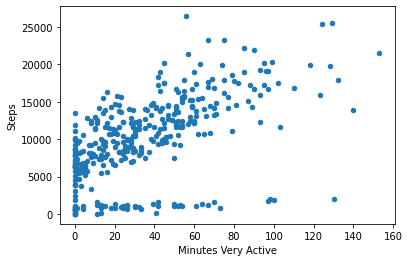

In [38]:
fitbit.plot.scatter(x = 'Minutes Very Active',y = 'Steps' )

In [40]:
fitbit.corr().loc[['Minutes Very Active'],['Steps']]

,Steps
Minutes Very Active,0.571452


#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

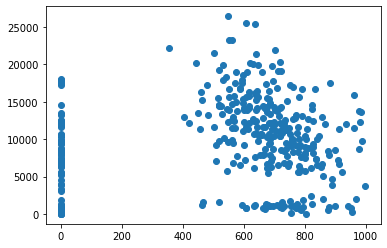

In [41]:
# your answer here
from sklearn import linear_model
model = linear_model.LinearRegression()

x =fitbit[['Minutes Sedentary']]
y=fitbit['Steps']
plt.scatter(x,y)

In [42]:
fitbit.corr().loc[['Minutes Sedentary'],['Steps']]

,Steps
Minutes Sedentary,0.076906


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [43]:
# your answer here
print('This two variables have a low correlation between each other it is almost 0')

This two variables have a low correlation between each other it is almost 0


#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [44]:
# your answer here
fitbit.corr().loc[['MinutesOfSleep'],['Steps']]

,Steps
MinutesOfSleep,0.130986


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

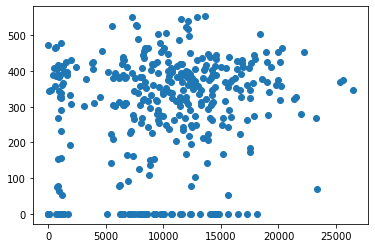

In [45]:
# your answer here
y = fitbit['MinutesOfSleep']
x = fitbit['Steps']
plt.scatter(x,y)

In [46]:
print('based on the scatter plot, the correlation between the two variables is low')

based on the scatter plot, the correlation between the two variables is low


#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [47]:
# your answer here
cor_fit = pd.DataFrame(fitbit, columns= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep'])
cor_fit.head()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407


In [48]:
cor_matrix = cor_fit.corr()
cor_matrix

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [49]:
# your answer here
cor_matrix.sort_values(by='Steps', ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [52]:
# your answer here
time_grades = pd.read_csv('data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

/home/jorgebra/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:323: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Grade'}>,
        <AxesSubplot:title={'center':'Study time'}>]], dtype=object)

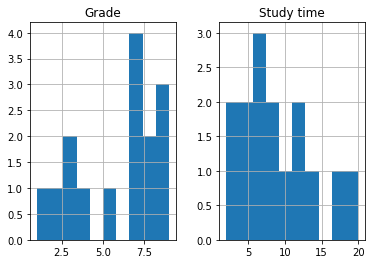

In [53]:
# your answer here
time_grades.hist()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [54]:
# your answer here
time_grades.corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [55]:
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

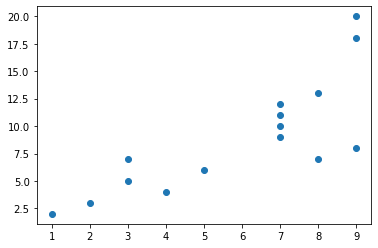

In [56]:
# your answer here
x =time_grades['Grade']

y=time_grades['Study time']

plt.scatter(x,y)

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [57]:
# your answer here
print('If I want to rate growth I use Pearson correlation. If I want to find the direction of growth I use Spearman correlation')

If I want to rate growth I use Pearson correlation. If I want to find the direction of growth I use Spearman correlation
